In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
in_file = 'framingham.csv'
data = pd.read_csv(in_file)
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


From the Framingham Heart Study dataset, we can observe a variety of features that provide insights into the health and lifestyle of each participant. These features include demographic information, health metrics, and lifestyle factors that contribute to understanding cardiovascular health:



**male**: Indicates the gender of the participant. Typically coded as 1 for male and 0 for female.

**age**: The age of the participant in years.

**education**: The educational attainment of the participant, often categorized (1= high school Degree , 2 = Bachelor Degree , 3 = Master Degree , 4 = Phd Degree")

**currentSmoker**: Indicates whether the participant currently smokes tobacco. Usually coded as 1 for yes and 0 for no.

**cigsPerDay**: The average number of cigarettes smoked per day by the participant.

**BPMeds**: Indicates whether the participant is currently taking blood pressure medication. Typically coded as 1 for yes and 0 for no.

**prevalentStroke**: Indicates whether the participant has a history of stroke. Coded as 1 for yes and 0 for no.

**prevalentHyp**: Indicates whether the participant has been diagnosed with hypertension (high blood pressure). Coded as 1 for yes and 0 for no.

**diabetes**: Indicates whether the participant has diabetes. Coded as 1 for yes and 0 for no.

**totChol**: Total cholesterol level in mg/dL.

**sysBP**: Systolic blood pressure (the pressure in the arteries when the heart beats) measured in mmHg.

**diaBP**: Diastolic blood pressure (the pressure in the arteries when the heart is at rest) measured in mmHg.

**BMI**: Body Mass Index, a measure of body fat based on height and weight, usually expressed as kg/m².

**heartRate**: The participant's resting heart rate, typically measured in beats per minute (bpm).

**glucose**: Blood glucose level, often measured in mg/dL, which is important for assessing diabetes and metabolic health.

**TenYearCHD**: Indicates whether the participant is likely to develop coronary heart disease within the next ten years. Coded as 1 for yes and 0 for no.




# Checking for Missing Values¶


In [3]:
missing_data=data.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
The total percentage of missing data is 15.21%


In [5]:
# Drop missing values
data.dropna(axis=0,inplace=True)


In [25]:
# Check For Duplicate Data and Drop them if found
data_dup = data.duplicated().any()
print(data_dup)

False


# Get Information about data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


## get Correlation for all data 

<Axes: >

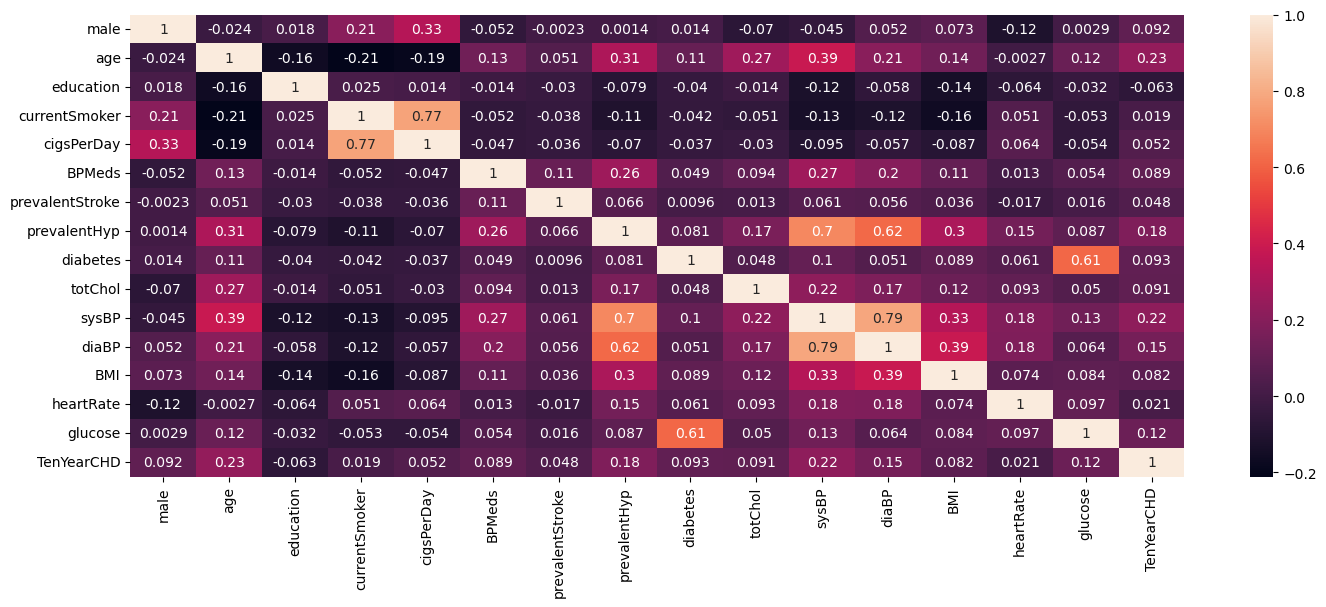

In [11]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(), annot=True)

# ** Distribution of `TenYearCHD`**
Let's start by understanding how many people in the dataset develop CHD (`TenYearCHD = 1`) compared to those who do not.


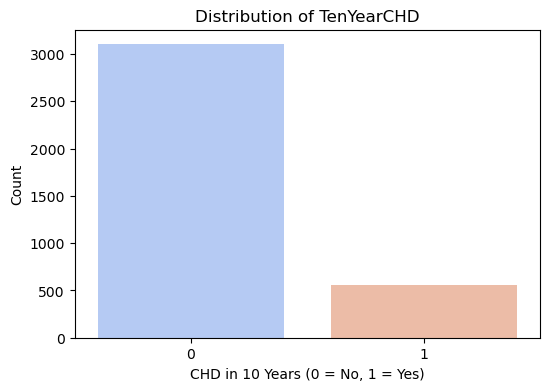

In [13]:
# Countplot to visualize the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=data, palette="coolwarm", hue='TenYearCHD', dodge=False)
plt.title('Distribution of TenYearCHD')
plt.xlabel('CHD in 10 Years (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Hides the legend
plt.show()


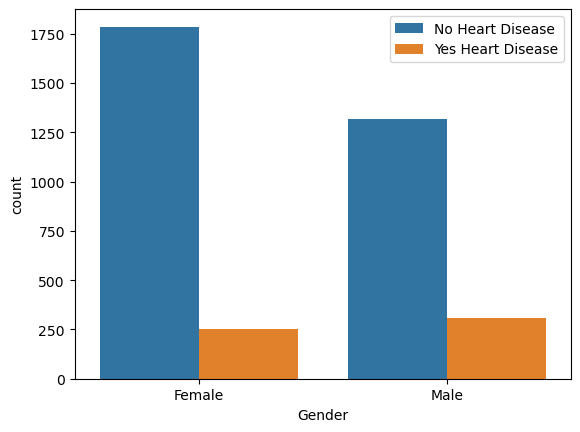

In [15]:
sns.countplot(x='male', hue="TenYearCHD", data=data)
plt.xticks([0, 1], ['Female', 'Male'])  # Renaming ticks for 0 and 1
plt.xlabel('Gender')  # Setting the x-axis label to "Gender"
plt.legend(labels=['No Heart Disease', 'Yes Heart Disease'])  # Customizing legend
plt.show()


# Check Age Distribution In The Dataset

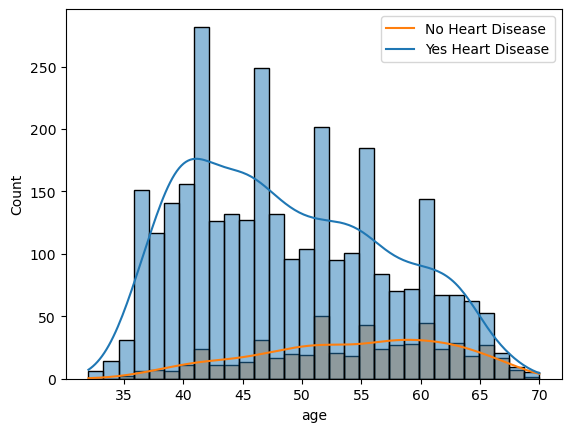

In [17]:
sns.histplot(data=data, x="age", hue='TenYearCHD', kde=True,  bins=30)
plt.legend(labels=['No Heart Disease','Yes Heart Disease'])
plt.show()


# Show The "Education" Level Distribution As per "TenYearCHD"

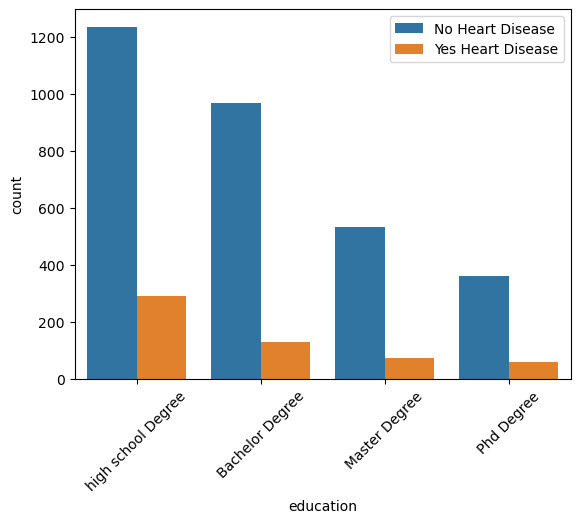

In [28]:
sns.countplot(x="education",hue="TenYearCHD",data=data)
plt.xticks([0,1,2,3],["high school Degree","Bachelor Degree","Master Degree","Phd Degree"])
plt.xticks(rotation =45)
plt.legend(labels=['No Heart Disease','Yes Heart Disease'])
plt.show()

## Checking continous_values & categorical_values

In [30]:
categorical_values=[]
continous_values=[]

for column in data.columns:
    if data[column].nunique() <=10:
        categorical_values.append(column)
    else:
        continous_values.append(column)

In [32]:
continous_values

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [34]:
categorical_values

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

#  Boxplots of Continuous Features by `TenYearCHD`
We will visualize how continuous variables such as `age`, `BMI`, `sysBP`, and `glucose` differ between those with and without CHD.


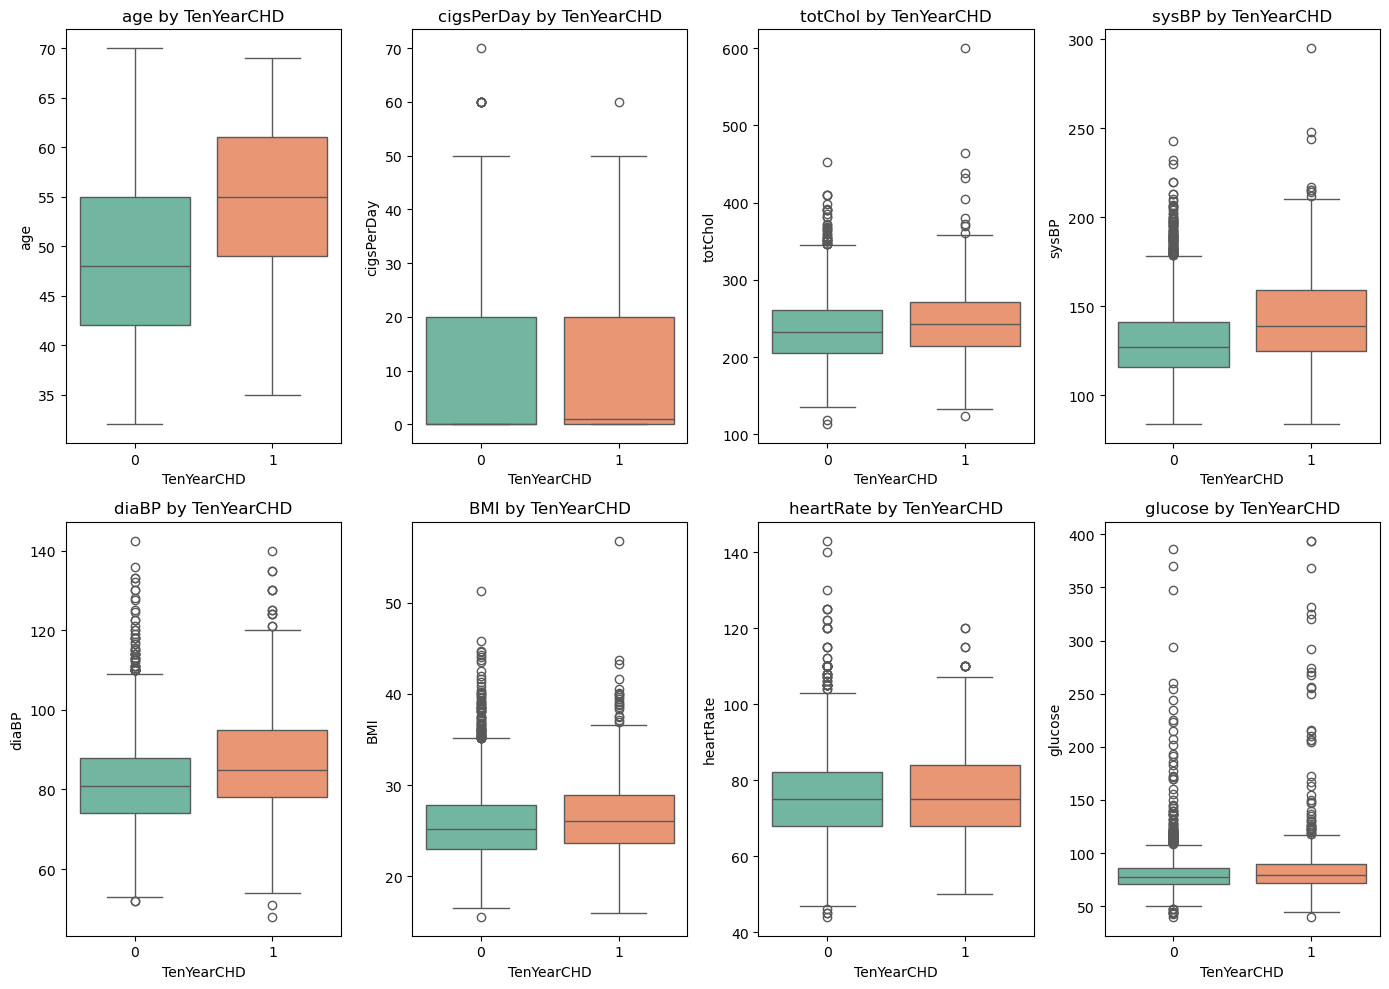

In [80]:
# Continuous features to analyze
features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='TenYearCHD', y=feature, hue='TenYearCHD', data=data, palette="Set2", legend=False)
    plt.title(f'{feature} by TenYearCHD')
plt.tight_layout()
plt.show()


#  Barplots for Categorical Features
We examine how categorical features such as `male`, `currentSmoker`, `prevalentStroke`, and `diabetes` impact the likelihood of developing CHD.


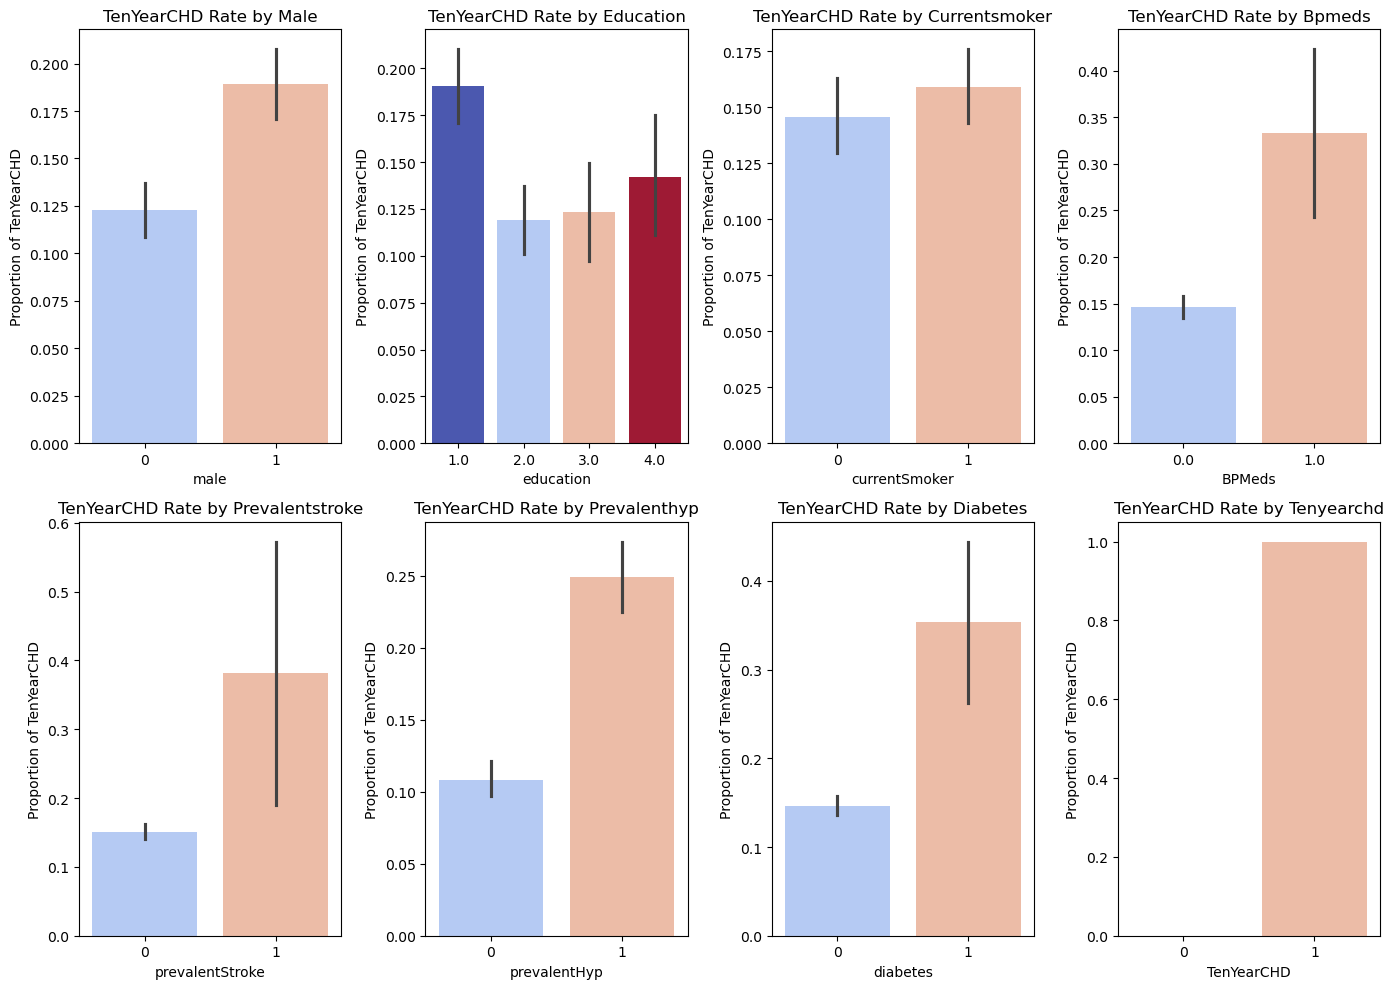

In [70]:
# Categorical features to analyze
categorical_features = ['male','education','currentSmoker', 'BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.barplot(x=feature, y='TenYearCHD', hue=feature, data=data, palette="coolwarm", legend=False)
    plt.title(f'TenYearCHD Rate by {feature.capitalize()}')
    plt.ylabel('Proportion of TenYearCHD')

plt.tight_layout()
plt.show()


#  Histograms or KDE Plots for Risk Factors
We visualize how continuous risk factors such as `sysBP`, `totChol`, and `glucose` are distributed among people with and without CHD.


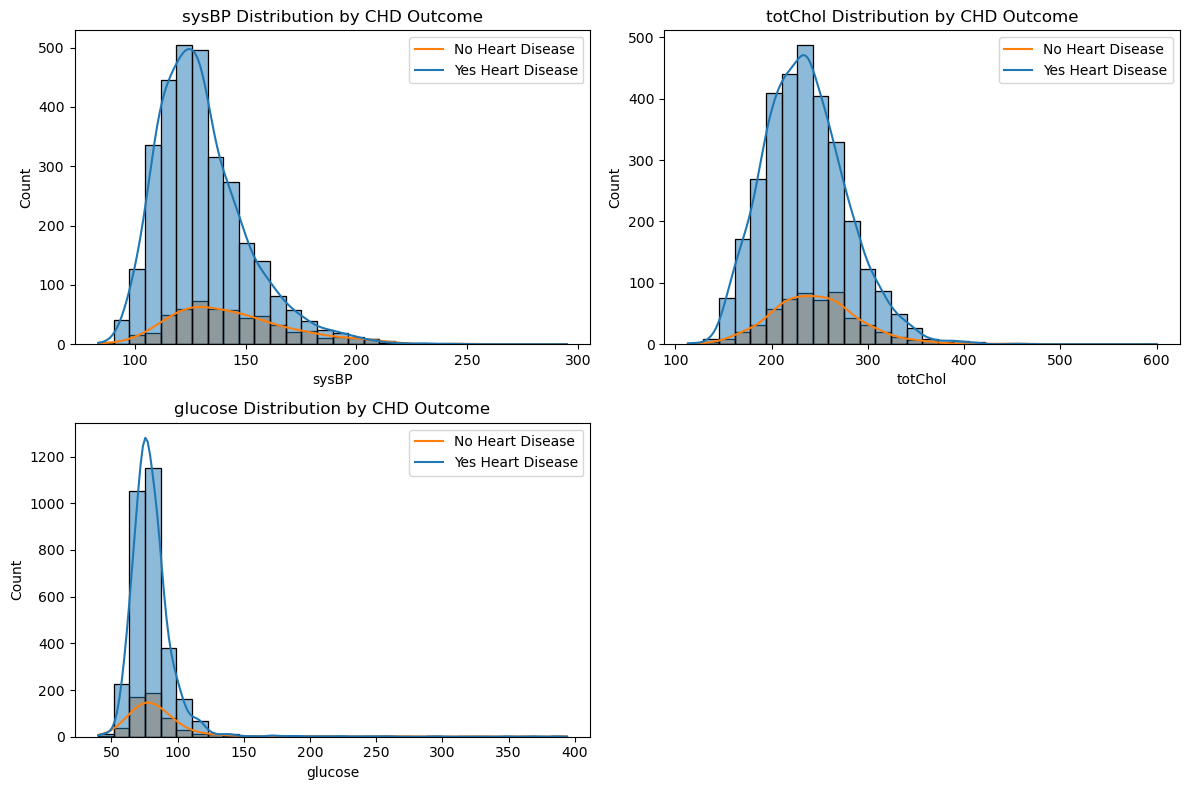

In [21]:
# Risk factors to analyze
risk_factors = ['sysBP', 'totChol', 'glucose']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(risk_factors, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=feature, hue='TenYearCHD', kde=True,  bins=30)
    plt.title(f'{feature} Distribution by CHD Outcome')
    plt.legend(labels=['No Heart Disease','Yes Heart Disease'])
plt.tight_layout()
plt.show()


# **Summary of Insights**
- From the **distribution of `TenYearCHD`**, we can see if the dataset is balanced or imbalanced (i.e., significantly more 0s than 1s).
- The **distribution of** `TenYearCHD` by gender shows that the number of men affected by heart disease is greater than that of women.
- From the **distribution of** `education` levels, it has been observed that education influences the likelihood of heart disease. Individuals with lower levels of education have a higher probability of developing heart disease."
- The **boxplots** reveal the distribution of continuous variables, such as `age`, `BMI`, `sysBP`, and `glucose`, and how they differ between CHD outcomes.
- The **correlation heatmap** provides insights into relationships between various variables, such as the correlation between blood pressure (`sysBP` and `diaBP`) and CHD.
- **Barplots** for categorical variables like `currentSmoker`, `diabetes`, and `male` highlight their impact on CHD risk.
- **Histograms/KDE plots** show how risk factors like `sysBP`, `totChol`, and `glucose` are distributed for individuals with and without CHD.
